In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

У нас получается большая разница между признаками. Уменьшим её

In [6]:
# Здесь решил поиграться с графииком

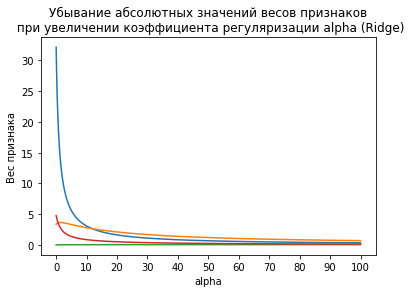

In [26]:
from sklearn.linear_model import Ridge

n = 100

train_amount = 7
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Коэффициент регуляризации: 0.01830738280295368
Веса: [5.99038837 5.99038837 0.05329    5.99038837]
MSE на обучении: 0.11124786512242324
MSE на тесте: 2529.602389261138


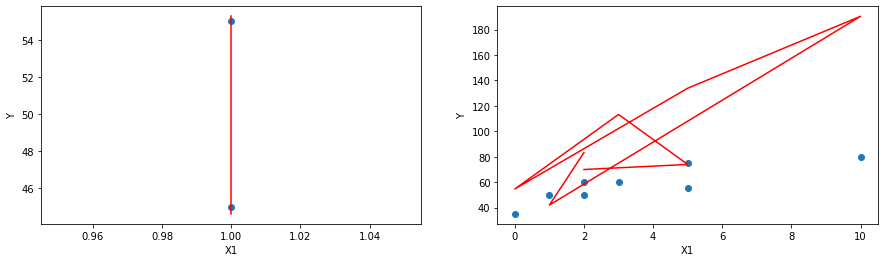

In [8]:
index = 25

coef = coeffs[index]

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

Выводы:
    На обучение нужно отдать 80%, чтобы  MSE на обучении: 35.91316781735312 и MSE на тесте: 57.89692137775884 хоть как-то рядом упали
    Если увеличим n для alpha, то MSE на обучении: 27.52887644092297 и MSE на тесте: 28.9700613635071635 будет переобучение
    
    По итогу на обучение нужно отдать 80%
    Самым оптимальным вариантом будет 
    n = 100, index = 25
    train_amount = 8
    
    MSE на обучении: 27.52887644092297
    MSE на тесте: 28.970061363507163

In [9]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [10]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

Прекрасно

In [11]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

3.0


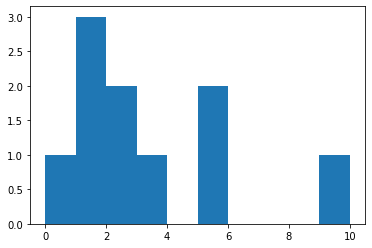

In [12]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


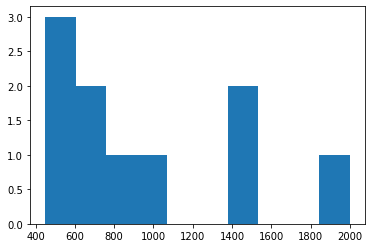

In [13]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [14]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [15]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


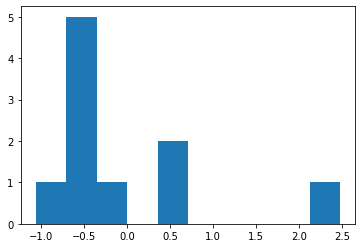

In [16]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
W = np.random.randn(X.shape[1])
W

array([-0.96352077,  0.05942075,  0.27986798,  0.83513057])

In [19]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [20]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [-0.47207383  0.25250394 -1.07804473  0.2480888 ], error 3568.430764145675
Iter: 500, weights: [56.49766278  5.9918615   0.86382977  5.62003241], error 25.161101022593265
Iter: 1000, weights: [56.4999999   6.21038093  0.07675204  6.21681565], error 24.937624392110372
Iter: 1500, weights: [56.5         6.27071058 -0.20079385  6.4431952 ], error 24.908894419087172
Iter: 2000, weights: [56.5         6.2914881  -0.30039963  6.52527075], error 24.905172805762106
Iter: 2500, weights: [56.5         6.29891882 -0.33623681  6.55484345], error 24.904690642778526
Iter: 3000, weights: [56.5         6.30159099 -0.34913534  6.56548944], error 24.904628174745767
Iter: 3500, weights: [56.5         6.30255268 -0.35377801  6.56932146], error 24.904620081516917
Iter: 4000, weights: [56.5         6.30289883 -0.3554491   6.57070076], error 24.90461903297496
Iter: 4500, weights: [56.5         6.30302343 -0.35605059  6.57119723], error 24.90461889712806
Final MSE: 24.904618879528005


array([56.5       ,  6.30306822, -0.35626685,  6.57137573])

Ну в принципе хорошо.
Final MSE: 24.904618879625307
MSE на тесте: 24.784896762596595

In [21]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [22]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 0.46345168 -0.56775616  0.77118265 -0.92026548], error 3462.9805749546067
Iter: 500, weights: [56.21673194  5.80525117  1.52895704  5.09414504], error 25.601863084783396
Iter: 1000, weights: [56.21890539  6.10848151  0.40775671  5.9519416 ], error 25.087322205843414
Iter: 1500, weights: [5.62189055e+01 6.18999376e+00 3.09170633e-02 6.25969164e+00], error 25.010881438539123
Iter: 2000, weights: [56.21890547  6.21681454 -0.09775359  6.36573543], error 24.996202719687084
Iter: 2500, weights: [56.21890547  6.22594388 -0.14178755  6.40207298], error 24.992522289861665
Iter: 3000, weights: [56.21890547  6.22906675 -0.15686182  6.4145148 ], error 24.99141983058447
Iter: 3500, weights: [56.21890547  6.23013574 -0.16202247  6.41877435], error 24.991060862829247
Iter: 4000, weights: [56.21890547  6.2305017  -0.16378922  6.42023262], error 24.990940133262768
Iter: 4500, weights: [56.21890547  6.23062699 -0.16439407  6.42073186], error 24.99089905491595
Final MSE: 24.9908850214

array([56.21890547,  6.23066984, -0.16460091,  6.42090258])

In [23]:
# Изменим для L1 def gradient_descent_reg_l2

In [24]:
# W = ((W) / (((W**2)**0.5))) - это произодная |W|

def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    
    W1 = ((W) / (((W**2)**0.5))) # Здесь перезаписываю W
    
    W1 = np.float64(W) # Меняю тип с int на float
    
    n = X.shape[0]
    
    print(W1) # проверка записи
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W1)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W1 # градиент регуляризации
        
        W1 -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W1}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W1))}')
    return W

In [25]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.7370045  -0.96645098 -0.24255806  0.04144401], error 3441.985914568156
Iter: 500, weights: [56.4948888   5.89090215  1.14159651  5.43190396], error 25.288661492351743
Iter: 1000, weights: [56.49717505  6.187852    0.1732841   6.13931777], error 24.95389485281475
Iter: 1500, weights: [56.49717514  6.26287009 -0.16508414  6.4139086 ], error 24.911088324940856
Iter: 2000, weights: [56.49717514  6.28823171 -0.28630487  6.51372323], error 24.90549475992261
Iter: 2500, weights: [56.49717514  6.29727263 -0.32988925  6.54968521], error 24.90475100240318
Iter: 3000, weights: [56.49717514  6.30052095 -0.34556789  6.56262563], error 24.904647615481995
Iter: 3500, weights: [56.49717514  6.30168935 -0.35120838  6.56728123], error 24.904631671373583
Iter: 4000, weights: [56.49717514  6.30210969 -0.35323761  6.56895614], error 24.904628685710563
Iter: 4500, weights: [56.49717514  6.30226091 -0.35396765  6.5695587 ], error 24.90462796756493
Final MSE: 24.904627755277808


array([56.49717514,  6.30231525, -0.35422999,  6.56977524])

Вроде получилось.